In [2]:

































!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip list 

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           6.1.0
astropy-iers-data 

In [4]:

import tensorflow as tf
import os

In [5]:

import cv2
import imghdr

C:\Users\HP\AppData\Local\Temp\ipykernel_712\2453474411.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:

data_dir = 'data' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:

data = tf.keras.utils.image_dataset_from_directory('data')

Found 297 files belonging to 2 classes.


In [10]:

data_iterator = data.as_numpy_iterator()

In [11]:

batch = data_iterator.next()

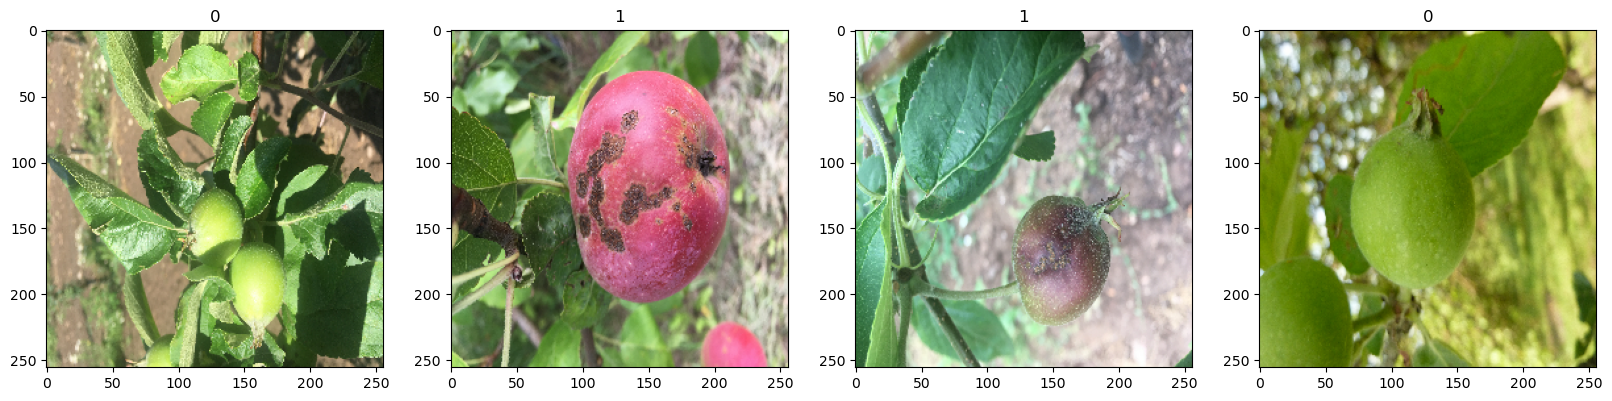

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[3.93872559e-01, 4.05637264e-01, 9.58333313e-02],
          [4.19944853e-01, 4.16023284e-01, 1.61121324e-01],
          [4.46645230e-01, 4.34880525e-01, 1.63311884e-01],
          ...,
          [2.90073544e-01, 2.91314334e-01, 8.69791657e-02],
          [3.10294122e-01, 3.02450985e-01, 1.10294119e-01],
          [3.04488361e-01, 3.12331498e-01, 6.52726740e-02]],
 
         [[4.05591309e-01, 4.12944227e-01, 1.23238355e-01],
          [4.13357854e-01, 4.13357854e-01, 1.23161763e-01],
          [4.31158096e-01, 4.38771456e-01, 1.12147674e-01],
          ...,
          [2.64843762e-01, 2.84681380e-01, 5.67708351e-02],
          [2.62025118e-01, 2.71951586e-01, 6.54564947e-02],
          [2.61596203e-01, 2.78584570e-01, 7.46783093e-02]],
 
         [[3.82674634e-01, 3.98651958e-01, 9.26011056e-02],
          [4.07720596e-01, 4.18627441e-01, 1.18382350e-01],
          [4.00245100e-01, 4.04181987e-01, 1.06495097e-01],
          ...,
          [2.38143384e-01, 2.67049640e-01, 5.1240

In [15]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)

In [16]:

train_size

8

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

F:\New folder\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [23]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.5370 - loss: 0.8739 - val_accuracy: 0.6875 - val_loss: 0.6345
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.7018 - loss: 0.6281 - val_accuracy: 0.7812 - val_loss: 0.5358
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.6842 - loss: 0.6121 - val_accuracy: 0.7188 - val_loss: 0.5210
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.6629 - loss: 0.5857 - val_accuracy: 0.6875 - val_loss: 0.5622
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.7028 - loss: 0.5542 - val_accuracy: 0.6250 - val_loss: 0.5096
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.7507 - loss: 0.4501 - val_accuracy: 0.8438 - val_loss: 0.4057
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8217 - loss: 0.4219 - val_accuracy: 1.0000 - val_loss: 0.2246
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8532 - loss: 0.3480 - val_accuracy: 0.8438 - val_loss: 0.4146
Epoch 9/

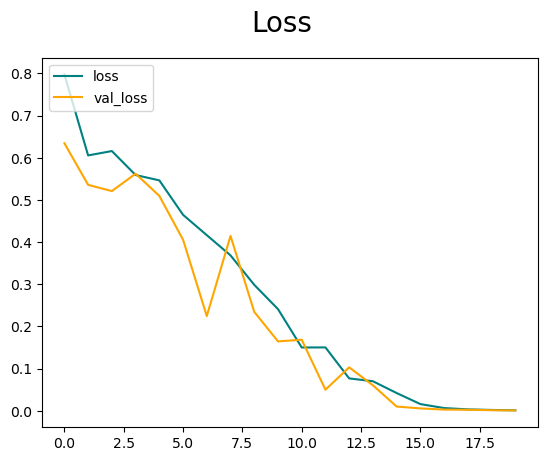

In [28]:

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

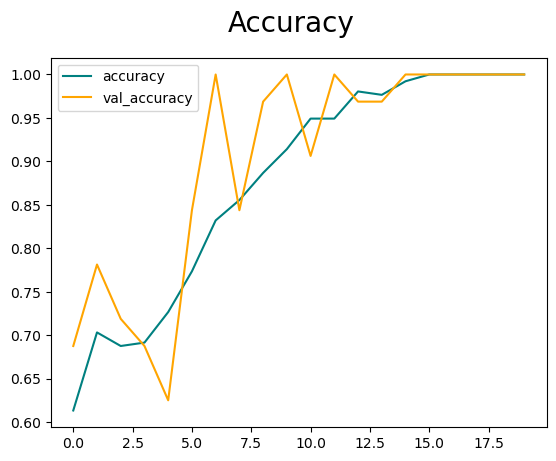

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [34]:
import cv2

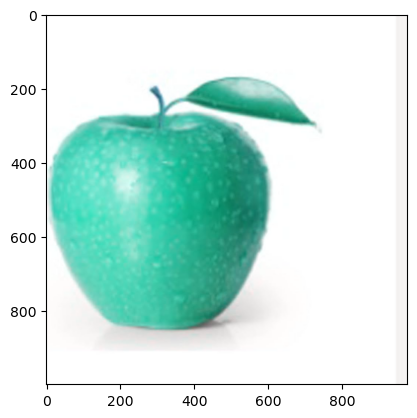

In [73]:
img = cv2.imread('healthy2.jpg')
plt.imshow(img)
plt.show()

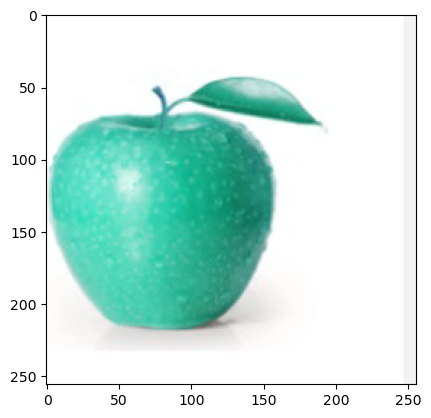

In [74]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [75]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [76]:

yhat

array([[0.02425102]], dtype=float32)

In [77]:
if yhat > 0.5: 
    print(f'Predicted apple is Scab')
else:
    print(f'Predicted apple is Healthy')

Predicted apple is Healthy


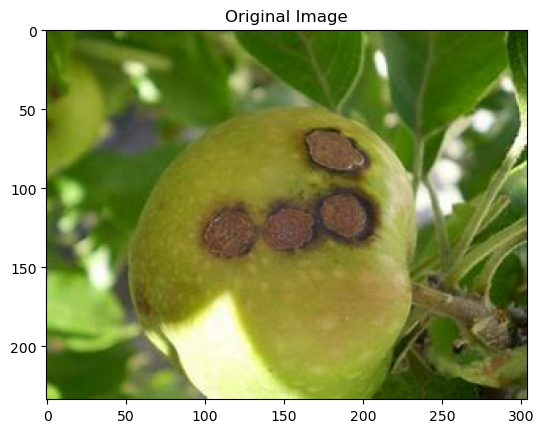

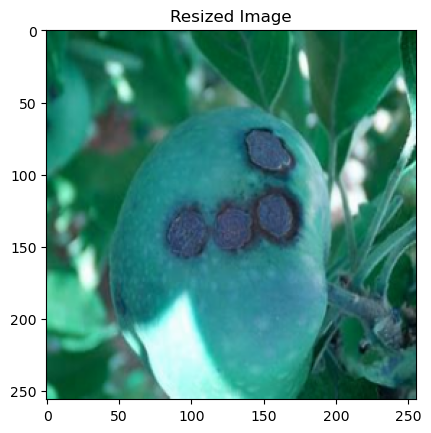

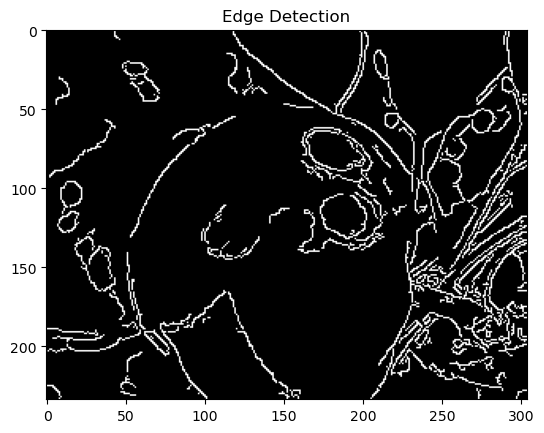

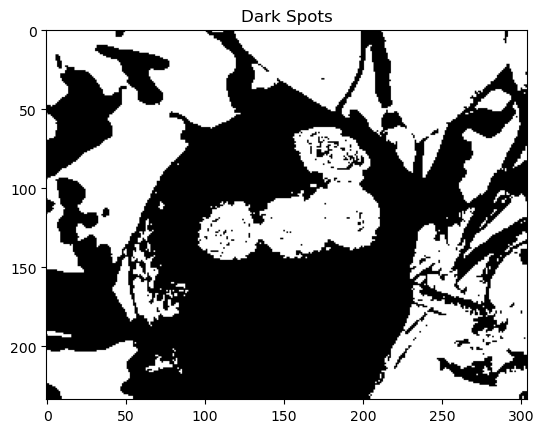

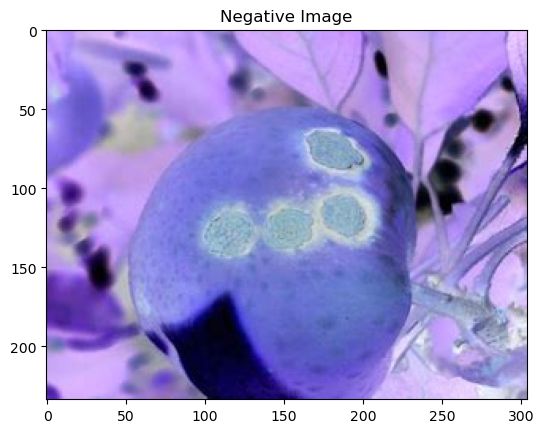

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class is Scab Apple


In [83]:
import cv2

# Load and display the original image
img = cv2.imread('scabtest.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

# Resize image for model input
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.title("Resized Image")
plt.show()

# Edge Detection
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.show()

# Spot Detection (using thresholding to highlight dark spots)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, spots = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
plt.imshow(spots, cmap='gray')
plt.title("Dark Spots")
plt.show()

# Negative Image
negative = cv2.bitwise_not(img)
plt.imshow(cv2.cvtColor(negative, cv2.COLOR_BGR2RGB))
plt.title("Negative Image")
plt.show()

# Make prediction
yhat = model.predict(np.expand_dims(resize/255, 0))

# Display prediction result
if yhat > 0.5:
    print(f'Predicted class is Scab Apple')
else:
    print(f'Predicted class is Healthy Apple')


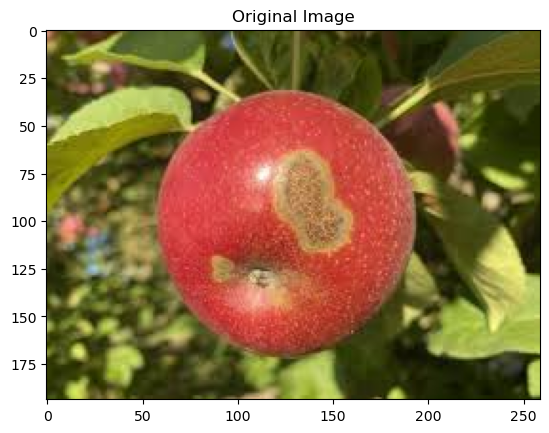

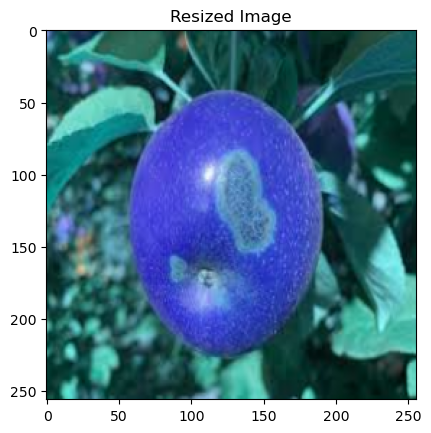

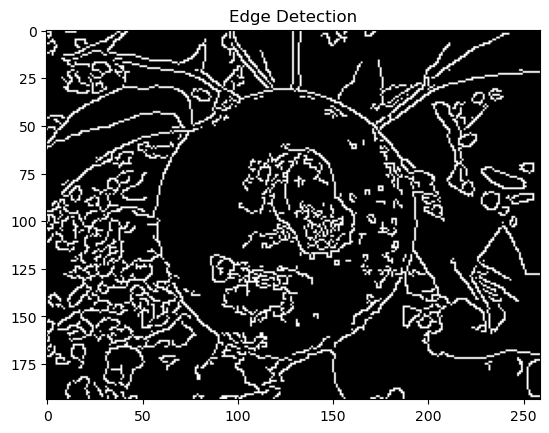

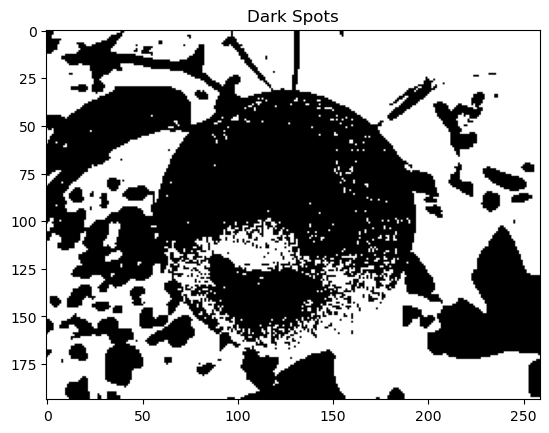

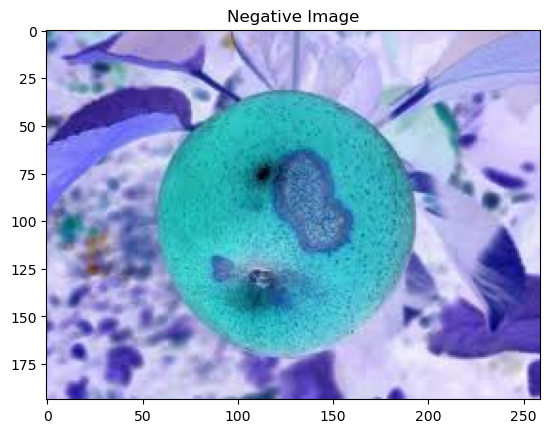

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted class is Scab Apple


In [62]:
import cv2

# Load and display the original image
img = cv2.imread('scab3.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

# Resize image for model input
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.title("Resized Image")
plt.show()

# Edge Detection
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.show()

# Spot Detection (using thresholding to highlight dark spots)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, spots = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
plt.imshow(spots, cmap='gray')
plt.title("Dark Spots")
plt.show()

# Negative Image
negative = cv2.bitwise_not(img)
plt.imshow(cv2.cvtColor(negative, cv2.COLOR_BGR2RGB))
plt.title("Negative Image")
plt.show()

# Make prediction
yhat = model.predict(np.expand_dims(resize/255, 0))

# Display prediction result
if yhat > 0.5:
    print(f'Predicted class is Scab Apple')
else:
    print(f'Predicted class is Healthy Apple')


In [43]:
from tensorflow.keras.models import load_model

In [50]:
model.save(os.path.join('models','appleclassifier.h5'))

In [51]:
new_model = load_model(os.path.join('models','appleclassifier.h5'))

In [57]:
import time

Get ready! Capturing image in 10 seconds...


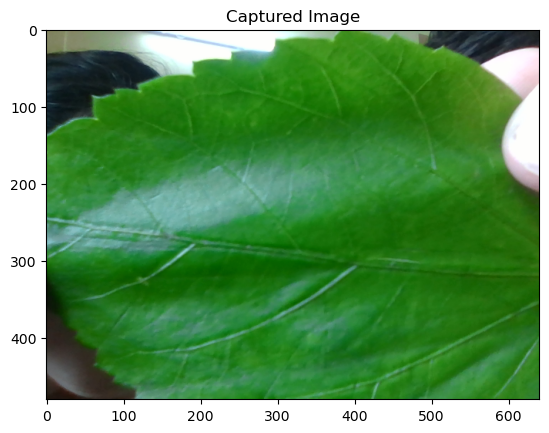

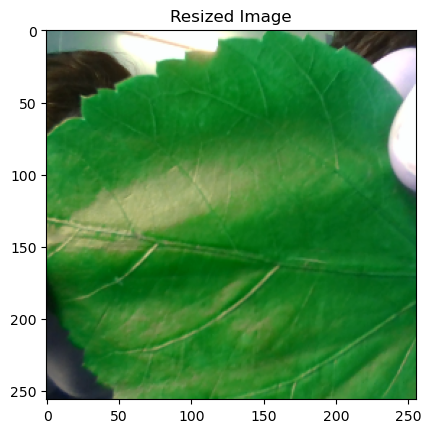

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted class is Scab Apple


In [82]:
print("Get ready! Capturing image in 10 seconds...")
time.sleep(10)

cap = cv2.VideoCapture(0)  # 0 is the default camera index

if not cap.isOpened():
    print("Cannot open camera")
    exit()

ret, img = cap.read()  # Capture a single frame
cap.release()  # Release the camera

if not ret:
    print("Failed to grab frame")
    exit()

# Display the captured image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Captured Image")
plt.show()

# Resize image for model input
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.title("Resized Image")
plt.show()

# # Edge Detection
# edges = cv2.Canny(img, 100, 200)
# plt.imshow(edges, cmap='gray')
# plt.title("Edge Detection")
# plt.show()

# # Spot Detection (using thresholding to highlight dark spots)
# # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # _, spots = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
# # plt.imshow(spots, cmap='gray')
# # plt.title("Dark Spots")
# # plt.show()

# # Negative Image
# negative = cv2.bitwise_not(img)
# plt.imshow(cv2.cvtColor(negative, cv2.COLOR_BGR2RGB))
# plt.title("Negative Image")
# plt.show()

# Make prediction
yhat = model.predict(np.expand_dims(resize / 255, 0))


# Display prediction result
if yhat > 0.5:
    print(f'Predicted class is Scab Apple')
else:
    print(f'Predicted class is Healthy Apple')


In [78]:
yhat


































array([[0.02425102]], dtype=float32)